In [1]:
## Uploading files from your local file system to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving caltech101.zip to caltech101.zip
User uploaded file "caltech101.zip" with length 120300520 bytes


In [2]:
ls

caltech101.zip  sample_data/


In [3]:
## upload한 file의 압축을 풀어줌 -d option은 target directory 이름 설정
!unzip caltech101.zip -d caltech101

Archive:  caltech101.zip
  inflating: caltech101/yin_yang/image_0001.jpg  
  inflating: caltech101/yin_yang/image_0002.jpg  
  inflating: caltech101/yin_yang/image_0003.jpg  
  inflating: caltech101/yin_yang/image_0004.jpg  
  inflating: caltech101/yin_yang/image_0005.jpg  
  inflating: caltech101/yin_yang/image_0006.jpg  
  inflating: caltech101/yin_yang/image_0007.jpg  
  inflating: caltech101/yin_yang/image_0008.jpg  
  inflating: caltech101/yin_yang/image_0009.jpg  
  inflating: caltech101/yin_yang/image_0010.jpg  
  inflating: caltech101/yin_yang/image_0011.jpg  
  inflating: caltech101/yin_yang/image_0012.jpg  
  inflating: caltech101/yin_yang/image_0013.jpg  
  inflating: caltech101/yin_yang/image_0014.jpg  
  inflating: caltech101/yin_yang/image_0015.jpg  
  inflating: caltech101/yin_yang/image_0016.jpg  
  inflating: caltech101/yin_yang/image_0017.jpg  
  inflating: caltech101/yin_yang/image_0018.jpg  
  inflating: caltech101/yin_yang/image_0019.jpg  
  inflating: caltech101/y

In [4]:
ls

caltech101/  caltech101.zip  sample_data/


In [5]:
ls caltech101

accordion/     cougar_face/      gerenuk/       metronome/   soccer_ball/
airplanes/     crab/             gramophone/    minaret/     stapler/
anchor/        crayfish/         grand_piano/   Motorbikes/  starfish/
ant/           crocodile/        hawksbill/     nautilus/    stegosaurus/
barrel/        crocodile_head/   headphone/     octopus/     stop_sign/
bass/          cup/              hedgehog/      okapi/       strawberry/
beaver/        dalmatian/        helicopter/    pagoda/      sunflower/
binocular/     dollar_bill/      ibis/          panda/       tick/
bonsai/        dolphin/          inline_skate/  pigeon/      trilobite/
brain/         dragonfly/        joshua_tree/   pizza/       umbrella/
brontosaurus/  electric_guitar/  kangaroo/      platypus/    watch/
buddha/        elephant/         ketch/         pyramid/     water_lilly/
butterfly/     emu/              lamp/          revolver/    wheelchair/
camera/        euphonium/        laptop/        rhino/       wild_cat

In [6]:
## Importing Libraries

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

print(tf.__version__)

1.11.0-rc2


In [0]:
## training에 사용할 image size
img_width = 128
img_height = 128

In [0]:
## tfrecord file 이름과 경로 설정
tfrecord_train = 'train.tfrecord'
tfrecord_test = 'test.tfrecord'
tfrecord_dir = 'tfrecords'

if not os.path.exists(tfrecord_dir):
    os.makedirs(tfrecord_dir)

In [0]:
## image file 저장되어 있는 directory 이름
image_dir = 'caltech101'

In [10]:
## image file들이 저장되어 있는 경로 설정
cur_dir = os.getcwd()
image_path = os.path.join(cur_dir, image_dir)

## image file 경로에 directory가 몇 개 있는지(class 수) 확인
print ('{} categories in {}'.format(len(os.listdir(image_path)), image_path))

categories = sorted(os.listdir(image_path))
num_categ = len(categories)
print (categories)

101 categories in /content/caltech101
['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_hor

In [11]:
## image file 확장자
valid_exts = ['.jpg', '.png', '.jpeg', '.gif']

## directory 별로 image file을 읽어서 확장자를 확인하여 list에 저장, label도 함께 저장
imgnames = []
labels = []
for label, category in enumerate(categories):
    filelist = os.listdir(os.path.join(image_path, category))
    imglist = []
    for f in filelist:
        ext = os.path.splitext(f)[-1]
        ## 올바른 확장자인지 check
        if ext.lower() not in valid_exts:
            continue
        img = Image.open(os.path.join(image_path, category, f))
        img = np.asarray(img)        
        ## 해당 class의 image list에 추가
        imglist.append(f)        
    ## 전체 image list에 추가
    imgnames += imglist
    ## label 추가
    labels += [label]*len(imglist)
    print('{} {} images are found / Label : {}'.format(len(imglist), category, label))
print('Total : {} images are found'.format(len(imgnames)))

435 Faces images are found / Label : 0
435 Faces_easy images are found / Label : 1
200 Leopards images are found / Label : 2
798 Motorbikes images are found / Label : 3
55 accordion images are found / Label : 4
800 airplanes images are found / Label : 5
42 anchor images are found / Label : 6
42 ant images are found / Label : 7
47 barrel images are found / Label : 8
54 bass images are found / Label : 9
46 beaver images are found / Label : 10
33 binocular images are found / Label : 11
128 bonsai images are found / Label : 12
98 brain images are found / Label : 13
43 brontosaurus images are found / Label : 14
85 buddha images are found / Label : 15
91 butterfly images are found / Label : 16
50 camera images are found / Label : 17
43 cannon images are found / Label : 18
123 car_side images are found / Label : 19
47 ceiling_fan images are found / Label : 20
59 cellphone images are found / Label : 21
62 chair images are found / Label : 22
107 chandelier images are found / Label : 23
47 couga

In [12]:
# Data shuffle 후에 80%는 training set / 20%는 test set으로 나눔
numfiles = len(labels)
idxrand = np.random.permutation(numfiles)
idxtrain = idxrand[:int(0.8*numfiles)]
idxtest = idxrand[int(0.8*numfiles):]
print(len(idxtrain), len(idxtest))

6941 1736


In [0]:
## tfrecord file 경로 설정
train_tfr_path = os.path.join(cur_dir, tfrecord_dir, tfrecord_train)
test_tfr_path = os.path.join(cur_dir, tfrecord_dir, tfrecord_test)

## tfrecord writer
writer_train = tf.python_io.TFRecordWriter(train_tfr_path)
writer_test = tf.python_io.TFRecordWriter(test_tfr_path)

In [0]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [15]:
## training set을 tfrecord로 저장
train_cnt = 0
for idx in idxtrain:
    label = labels[idx]
    img_path = os.path.join(image_dir, categories[label], imgnames[idx])
    
    image = Image.open(img_path)    
    image = image.resize((img_height, img_width))
    
    image = np.asarray(image)
    ## rank=3인지 check하여 아닐 경우 3으로 확장(gray image)
    try:
        ch = image.shape[2]
    except:
        image = np.tile(np.expand_dims(image, axis=2), [1, 1, 3])
        ch = image.shape[2]
        
    if ch == 1:
        image = np.tile(image, [1, 1, 3])
        ch = image.shape[2]
    ## channel이 3인지 확인
    if ch != 3:        
        continue
    image_str = image.tobytes()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(image_str),
        'label': _int64_feature(label)
    }))
    writer_train.write(example.SerializeToString())
    train_cnt += 1
print ("{} train images are saved.".format(train_cnt))

6941 train images are saved.


In [16]:
## test set을 tfrecord로 저장
test_cnt = 0
for idx in idxtest:
    label = labels[idx]
    img_path = os.path.join(image_dir, categories[label], imgnames[idx])
    image = Image.open(img_path)    
    image = image.resize((img_height, img_width))
    
    image = np.asarray(image)
    ## rank=3인지 check하여 아닐 경우 3으로 확장(gray image)
    try:
        ch = image.shape[2]
    except:
        image = np.tile(np.expand_dims(image, axis=2), [1, 1, 3])
        ch = image.shape[2]
        
    if ch == 1:
        image = np.tile(image, [1, 1, 3])
        ch = image.shape[2]
    ## channel이 3인지 확인
    if ch != 3:        
        continue
    image_str = image.tobytes()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(image_str),
        'label': _int64_feature(label)
    }))
    writer_test.write(example.SerializeToString())
    test_cnt += 1
print ("{} test images are saved.".format(test_cnt))

1736 test images are saved.


In [0]:
writer_train.close()
writer_test.close()

In [18]:
ls

caltech101/  caltech101.zip  sample_data/  tfrecords/


In [19]:
ls tfrecords

test.tfrecord  train.tfrecord


In [0]:
tf.set_random_seed(777)

In [0]:
### training에 사용할 image size
#img_width = 128
#img_height = 128
### tfrecord file 이름과 디렉토리 설정
#tfrecord_train = 'train.tfrecord'
#tfrecord_test = 'test.tfrecord'
#tfrecord_dir = 'tfrecords

In [0]:
## tfrecord file 경로 설정
cur_dir = os.getcwd()
train_tfr_path = os.path.join(cur_dir, tfrecord_dir, tfrecord_train)
test_tfr_path = os.path.join(cur_dir, tfrecord_dir, tfrecord_test)

In [0]:
## hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 16

## class 갯수
n_class = 101
## training data 수
n_train = 6941
## test data 수
n_test = 1736
## learning rate decay ratio
lr_decay_ratio = 0.1
## 몇 epoch 마다 learning rate을 decay할 것인지
lr_decay_epoch_num = 5
## image file 위치
image_dir = 'caltech101'

In [0]:
def _parse_function(tfrecord_serialized):
    features={'image': tf.FixedLenFeature([], tf.string),
             'label': tf.FixedLenFeature([], tf.int64)}
    parsed_features = tf.parse_single_example(tfrecord_serialized, features)
    
    image = tf.decode_raw(parsed_features['image'], tf.uint8)
    label = tf.cast(parsed_features['label'], tf.int32)
    #label_onehot = tf.one_hot(label, depth=n_class)
        
    #image = tf.reshape(image, [-1, img_height, img_width, 3])
    
    return image, label

In [0]:
train_dataset = tf.data.TFRecordDataset(train_tfr_path)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=8)
train_dataset = train_dataset.shuffle(buffer_size=n_train*2).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
#print(train_dataset.output_types, train_dataset.output_shapes)

In [0]:
test_dataset = tf.data.TFRecordDataset(test_tfr_path)
test_dataset = test_dataset.map(_parse_function, num_parallel_calls=8)
test_dataset = test_dataset.shuffle(buffer_size=n_train*2).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
#print(test_dataset.output_types, test_dataset.output_shapes)

In [0]:
iterator = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
image, label = iterator.get_next()

In [0]:
train_init = iterator.make_initializer(train_dataset)
test_init = iterator.make_initializer(test_dataset)

In [0]:
image_post = tf.reshape(image, [-1, img_height, img_width, 3])
image_post = tf.cast(image_post, tf.float32) / 255.
label_onehot = tf.one_hot(label, depth=n_class)
is_train = tf.placeholder(tf.bool)

In [0]:
conv1 = tf.layers.conv2d(inputs=image_post, filters=32, kernel_size=[3, 3],
                        padding="SAME", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                        padding="SAME", strides=2)
bn1 = tf.layers.batch_normalization(pool1, training=is_train)
#bn1 = tf.contrib.layers.batch_norm(pool1, decay=0.9, is_training=is_train)
#drop1 = tf.layers.dropout(inputs=pool1, rate=0.3, training=is_train)

conv2 = tf.layers.conv2d(inputs=bn1, filters=64, kernel_size=[3, 3],
                        padding="SAME", activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                        padding="SAME", strides=2)
bn2 = tf.layers.batch_normalization(pool2, training=is_train)
#bn2 = tf.contrib.layers.batch_norm(pool2, decay=0.9, is_training=is_train)
#drop2 = tf.layers.dropout(inputs=pool2, rate=0.3, training=is_train)

conv3 = tf.layers.conv2d(inputs=bn2, filters=128, kernel_size=[3, 3],
                        padding="SAME", activation=tf.nn.relu)
pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                        padding="SAME", strides=2)
bn3 = tf.layers.batch_normalization(pool3, training=is_train)
#bn3 = tf.contrib.layers.batch_norm(pool3, decay=0.9, is_training=is_train)
#drop3 = tf.layers.dropout(inputs=pool3, rate=0.3, training=is_train)

In [0]:
flat3 = tf.contrib.layers.flatten(bn3)
dense4 = tf.layers.dense(inputs=flat3, units=625, activation=tf.nn.relu)
bn4 = tf.layers.batch_normalization(dense4, training=is_train)
#bn4 = tf.contrib.layers.batch_norm(dense4, decay=0.9, is_training=is_train)
#drop4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=is_train)

logits = tf.layers.dense(inputs=bn4, units=n_class)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=label_onehot))
global_step = tf.Variable(0, trainable=False)
lr_decay = tf.train.exponential_decay(learning_rate=learning_rate,
                                          global_step= global_step,
                                          decay_steps=int(n_train/batch_size*lr_decay_epoch_num),
                                          decay_rate= lr_decay_ratio,
                                          staircase=True)
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(
        cost)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(label_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# initialize
sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth =True)))
sess.run(tf.global_variables_initializer())

In [37]:
# train my model
print('Learning started. It takes sometime.')
max_test_acc = 0.
for epoch in range(training_epochs):
    avg_cost = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    
    total_batch = int(n_train / batch_size)
    total_batch_test = int(n_test / batch_size)
    
    sess.run(train_init)

    for i in range(total_batch):
        #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        #batch_xs = batch_xs.reshape(-1, time_steps, element_size)
        #sess.run([image, label])        
        feed_dict = {is_train:True}
        acc, c, _ = sess.run([accuracy, cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        avg_train_acc += acc / total_batch
        
    sess.run(test_init)
        
    for i in range(total_batch_test):
        #batch_xs, batch_ys = mnist.test.next_batch(batch_size)        
        #batch_xs = batch_xs.reshape(-1, time_steps, element_size)
        #sess.run([image, label])
        feed_dict = {is_train:False}
        acc = sess.run(accuracy, feed_dict=feed_dict)
        avg_test_acc += acc / total_batch_test

    print('Epoch:', '{}'.format(epoch + 1), 'cost =', '{:.8f}'.format(avg_cost), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 cost = 2.54111098 train accuracy =  0.4687 test accuracy =  0.4172
Epoch: 2 cost = 0.73142186 train accuracy =  0.8245 test accuracy =  0.6024
Epoch: 3 cost = 0.10136556 train accuracy =  0.9834 test accuracy =  0.6719
Epoch: 4 cost = 0.01167763 train accuracy =  0.9990 test accuracy =  0.7002
Epoch: 5 cost = 0.00225984 train accuracy =  0.9999 test accuracy =  0.7031
Epoch: 6 cost = 0.00103370 train accuracy =  1.0000 test accuracy =  0.7078
Epoch: 7 cost = 0.00072612 train accuracy =  1.0000 test accuracy =  0.7078
Epoch: 8 cost = 0.00053747 train accuracy =  1.0000 test accuracy =  0.7089
Epoch: 9 cost = 0.00040846 train accuracy =  1.0000 test accuracy =  0.7083
Epoch: 10 cost = 0.00031528 train accuracy =  1.0000 test accuracy =  0.7089
Epoch: 11 cost = 0.00024563 train accuracy =  1.0000 test accuracy =  0.7060
Epoch: 12 cost = 0.00019280 train accuracy =  1.0000 test accuracy =  0.7072
Epoch: 13 cost = 0.00015213 train accuracy =  1.

In [38]:
cur_dir = os.getcwd()
image_path = os.path.join(cur_dir, image_dir)

class_names = sorted(os.listdir(image_path))
print(class_names)

['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [0]:
sess.run(test_init)

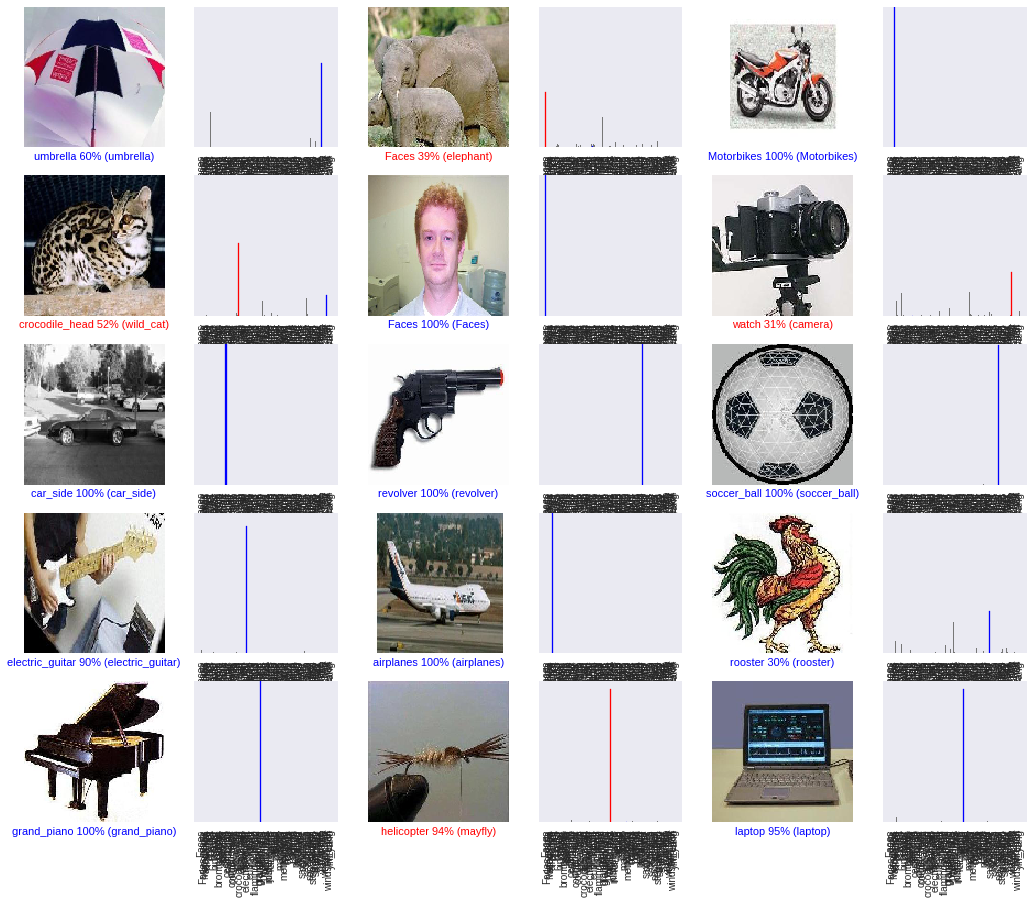

In [41]:
prob = tf.nn.softmax(logits)
imgs, lbs, x, y = sess.run([image, label, image_post, label_onehot])
imgs = np.reshape(imgs, [-1, img_height, img_width, 3])
predictions = sess.run(prob, feed_dict={image_post:x, label_onehot:y, is_train:False})
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, lbs, imgs)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, lbs)